In [1]:
import arrow as arw
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import xarray as xr

from salishsea_tools import places, teos_tools

%matplotlib inline

In [ ]:
hindcast_dataset = xr.open_dataset(
        'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSg3DTracerFields1hV17-02')

In [2]:
nowcastv1_dataset = xr.open_dataset(
         'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DTracerFields1hV1')

In [ ]:
nowcastv2_dataset = xr.open_dataset(
          'https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSn3DTracerFields1hV16-10')

In [2]:
def _prep_plot_data(xr_dataset, variable, place, weight1, weight2, poss1, poss2, state_day, end_day, factor=1):
    time_slice = slice(start_day.date(), end_day.replace(days=+1).date(), 1)
    grid_y, grid_x = places.PLACES[place]['NEMO grid ji']
    var_result1 = (
        xr_dataset[variable]
        .sel(time=time_slice)
        .isel(depth=poss1, gridX=grid_x, gridY=grid_y))
    var_result2 = (
        xr_dataset[variable]
        .sel(time=time_slice)
        .isel(depth=poss2, gridX=grid_x, gridY=grid_y))
    return (weight1*var_result1+weight2*var_result2)*factor

In [ ]:
def make_plot(use_title,  
              sal_obs,
              hindcast_ts_2014, hindcast_ts_2015, hindcast_ts_2016, hindcast_ts_2017,
              nowcastv2_ts_2016, nowcastv2_ts_2017, 
              nowcastv1_ts_2014, nowcastv1_ts_2015, nowcastv1_ts_2016):

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    sal_obs_hourly = sal_obs.resample('1H').mean()
    nowcastv2_ts_2017.plot(ax=ax, color='b', label='')
    sal_obs_hourly.plot(ax=ax, color='g', label='Observations')
    hindcast_ts_2014.plot(ax=ax, color='r', label='Hindcast')
    hindcast_ts_2015.plot(ax=ax, color='r', label='')
    hindcast_ts_2016.plot(ax=ax, color='r', label='')
    hindcast_ts_2017.plot(ax=ax, color='r', label='')
    nowcastv2_ts_2016.plot(ax=ax, color='b', label='Nowcast-V2')
    nowcastv1_ts_2014.plot(ax=ax, color='teal', label='Nowcast-V1')
    nowcastv1_ts_2015.plot(ax=ax, color='teal', label='')
    nowcastv1_ts_2016.plot(ax=ax, color='teal', label='')
    ax.legend()
    ax.set_ylabel('Reference Salinity (g/kg)')
    ax.set_xlabel('Date (UTC)')
    ax.set_title(use_title)


## Central Node ##

In [3]:
place = 'Central node'
poss1 = 34 -1
depth1 = 280
poss2 = poss1 + 1
depth2 = 307
depth = 294
weight1 = (depth2 - depth)/(depth2 - depth1)
weight2 = 1 - weight1
use_title = 'Salinity at VENUS Central'


In [4]:
observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCSCVIPCTD15mV1')

NameError: name 'sal_obs' is not defined

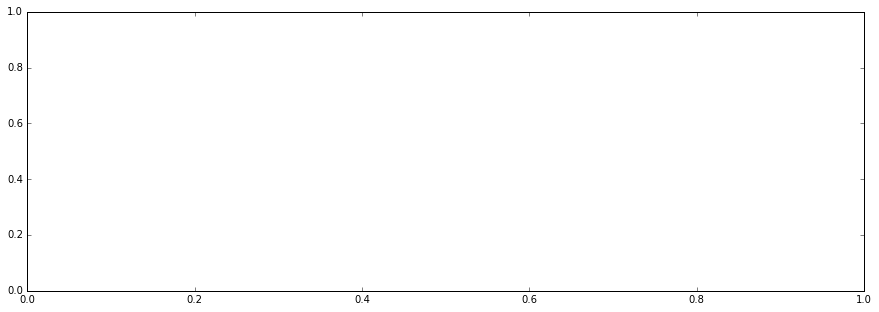

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5)) 
sal_obs_hourly = sal_obs.resample('1H').mean()
sal_obs_hourly.plot(ax=ax, color='g', label='Observations')    
ax.legend()
ax.set_ylabel('Reference Salinity (g/kg)')
ax.set_xlabel('Date (UTC)')
ax.set_title(use_title)
ax.set_xlim('20160601', '20160831')
ax.grid(which='both')

## These Cells need to be Run individually Rather than in a Function ##

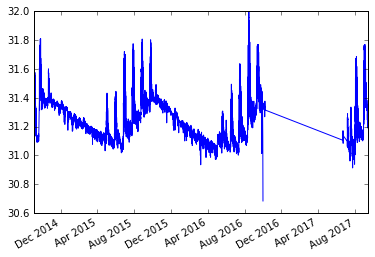

In [7]:
sals = observations_dataset.variables['s.salinity']
times = observations_dataset.variables['s.time']
jd = nc.num2date(times[:], times.units)
units_sav = times.units
sal_obs = pd.Series(sals[:], index=jd)
sal_obs.plot()

In [ ]:
# for cases without units (aka BBL)
sals = observations_dataset.variables['s.salinity']
times = observations_dataset.variables['s.time']
print(times)
#jd = nc.num2date(times[:], 'seconds since 1970-01-01T00:00:00Z')
sal_obs = pd.Series(sals[:], index=times)

In [ ]:
print(place)
start_day = arw.get(hindcast_dataset.time_coverage_start)
end_day = arw.get('2014-12-31T23:59:59')
hindcast_ts_2014 = _prep_plot_data(hindcast_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day)


In [ ]:
print(place)
start_day = arw.get('2014-12-31T23:59:59')
end_day = arw.get('2015-12-31T23:59:59')
hindcast_ts_2015 = _prep_plot_data(hindcast_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day)


In [ ]:
print(place)
start_day = arw.get('2015-12-31T23:59:59')
end_day = arw.get('2016-12-31T23:59:59')
hindcast_ts_2016 = _prep_plot_data(hindcast_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day)


In [ ]:
print(place)
start_day = arw.get('2016-12-31T23:59:59')
end_day = arw.get(hindcast_dataset.time_coverage_end)
hindcast_ts_2017 = _prep_plot_data(hindcast_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day)


In [ ]:
print(place)
start_day = arw.get(nowcastv2_dataset.time_coverage_start)
end_day = arw.get('2016-12-31T23:59:59')
nowcastv2_ts_2016 = _prep_plot_data(nowcastv2_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day)


In [ ]:
print(place)
start_day = arw.get('2016-12-31T23:59:59')
end_day = arw.get(nowcastv2_dataset.time_coverage_end)
nowcastv2_ts_2017 = _prep_plot_data(nowcastv2_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day)


In [ ]:
print(place)
factor = teos_tools.PSU_TEOS
start_day = arw.get(nowcastv1_dataset.time_coverage_start)
end_day = arw.get('2014-12-31T23:59:59')
nowcastv1_ts_2014 = _prep_plot_data(nowcastv1_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day, factor)


In [ ]:
print(place)
start_day = arw.get('2014-12-31T23:59:59')
end_day = arw.get('2015-12-31T23:59:59')
nowcastv1_ts_2015 = _prep_plot_data(nowcastv1_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day, factor)


In [ ]:
print(place)
start_day = arw.get('2015-12-31T23:59:59')
end_day = arw.get('2016-12-31T23:59:59')
nowcastv1_ts_2016 = _prep_plot_data(nowcastv1_dataset, 'salinity', place, weight1, weight2, poss1, poss2, start_day, end_day, factor)


## East Node ##

In [ ]:
place = 'East node'
poss1 = 29 -1
depth1 = 147
poss2 = poss1 + 1
depth2 = 173
depth = 164
weight1 = (depth2 - depth)/(depth2 - depth1)
weight2 = 1 - weight1
use_title = 'Salinity at VENUS East'


In [ ]:
observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCSEVIPCTD15mV1')

### run all the ts cells one at a time and then plot

In [ ]:
make_plot(use_title,  
              sal_obs,
              hindcast_ts_2014, hindcast_ts_2015, hindcast_ts_2016, hindcast_ts_2017,
              nowcastv2_ts_2016, nowcastv2_ts_2017, 
              nowcastv1_ts_2014, nowcastv1_ts_2015, nowcastv1_ts_2016)

## Delta BBL Node ##

In [ ]:
place = 'Delta BBL node'
poss1 = 28 -1
depth1 = 122
poss2 = poss1 + 1
depth2 = 147
depth = 143
weight1 = (depth2 - depth)/(depth2 - depth1)
weight2 = 1 - weight1

use_title = 'Salinity at VENUS Delta BBL'

In [9]:
observations_dataset = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCLSBBLCTD15mV1.nc')#?time,salinity,temperature,temperature_std_dev,salinity_std_dev,salinity_sample_count,temperature_sample_count,latitude,longitude,depth')

OSError: NetCDF: file not found

### run all the ts cells one at a time and then plot

In [ ]:
make_plot(use_title,  
              sal_obs,
              hindcast_ts_2014, hindcast_ts_2015, hindcast_ts_2016, hindcast_ts_2017,
              nowcastv2_ts_2016, nowcastv2_ts_2017, 
              nowcastv1_ts_2014, nowcastv1_ts_2015, nowcastv1_ts_2016)
print(place)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
sal_obs_hourly = sal_obs.resample('1H').mean()
nowcastv2_ts_2017.plot(ax=ax, color='b', label='')
sal_obs_hourly.plot(ax=ax, color='k', label='Observations')    
# hindcast_ts_2014.plot(ax=ax, color='g', label='Hindcast')
# hindcast_ts_2015.plot(ax=ax, color='g', label='') 
# hindcast_ts_2016.plot(ax=ax, color='g', label='') 
# hindcast_ts_2017.plot(ax=ax, color='g', label='') 
nowcastv2_ts_2016.plot(ax=ax, color='b', label='Nowcast-V2')
nowcastv1_ts_2014.plot(ax=ax, color='teal', label='Nowcast-V1')
nowcastv1_ts_2015.plot(ax=ax, color='teal', label='')
nowcastv1_ts_2016.plot(ax=ax, color='teal', label='')
ax.legend()
ax.set_ylabel('Reference Salinity (g/kg)')
ax.set_xlabel('Date (UTC)')
ax.set_title(use_title)

## Delta DDL node ##

In [ ]:
place = 'Delta DDL node'
poss1 = 27 -1
depth1 = 98
poss2 = poss1 + 1
depth2 = 122
depth = 107
weight1 = (depth2 - depth)/(depth2 - depth1)
weight2 = 1 - weight1

In [8]:
observations_dataset = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/tabledap/ubcONCUSDDLCTD15mV1')

ValueError: One or more of the specified variables cannot be found in this dataset

In [ ]:
observations_sal = observations_dataset['s.salinity']
observations_time = observations_dataset['s.time']

In [ ]:
hindcast_ts = _prep_plot_data(hindcast_dataset, 'salinity', place, weight1, weight2, poss1, poss2)

In [ ]:
nowcastv2_ts = _prep_plot_data(nowcastv2_dataset, 'salinity', place, weight1, weight2, poss1, poss2)

In [ ]:
factor = teos_tools.PSU_TEOS
nowcastv1_ts = _prep_plot_data(nowcastv1_dataset, 'salinity', place, weight1, weight2, poss1, poss2, factor)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 5))
ax.plot(observations_time, observations_sal, 'g', label='Observations')
hindcast_ts.plot(ax=ax, color='r', label='Hindcast')
nowcastv2_ts.plot(ax=ax, label='Nowcast-V2')
nowcastv1_ts.plot(ax=ax, label='Nowcast-V1')
ax.legend()
ax.set_ylabel('Reference Salinity (g/kg)')
ax.set_xlabel('Date (UTC)')
ax.set_title('Salinity at VENUS Delta DDL')